# Model Info:
- Moondream's primary version for these tasks is the ~2B parameter model.
- Link: [Moondream 3 Preview](https://huggingface.co/moondream/moondream3-preview)
- They will shortly release the full Moondream 3 model (not just preview)
- We can also use this model: [Moondream 2](https://huggingface.co/vikhyatk/moondream2) (This is 2B Model)
- Moondream 2 requires about 4-6 GB VRAM for FP16 inference on a single GPU, with quantized 4-bit versions needing just 2.5 GB on an RTX 3090

Here we are just API for quick PoC

In [ ]:
!pip install moondream-station
!pip install moondream

In [ ]:
import moondream as md
from PIL import Image

model = md.vl(api_key="abcd")

image = Image.open("/content/Screenshot 2025-12-05 235011.png")

point_result = model.point(image, "Find the cars")
points = point_result["points"]
print(f"Found {len(points)} point(s)")

segments = []
for point in points:
    result = model.segment(
        image,
        "Find the cars",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append({
        "path": result["path"],
        "bbox": result["bbox"]
    })

print(f"Segments: {segments}")

Found 12 point(s)
Segments: [{'path': 'M.816,.994C.809,.990,.801,.980,.793,.965C.783,.947,.778,.941,.771,.939C.763,.937,.745,.938,.680,.945C.637,.950,.578,.953,.413,.961C.358,.964,.296,.967,.274,.969C.252,.971,.201,.973,.161,.975C.109,.977,.083,.979,.072,.983C.064,.985,.054,.988,.050,.988C.036,.987,.018,.981,.009,.974L-0.000,.966L.000,.911C.000,.856,.003,.835,.012,.826C.018,.819,.024,.779,.024,.745C.024,.696,.036,.675,.075,.658C.109,.642,.109,.642,.125,.534C.131,.492,.136,.461,.142,.433C.145,.420,.148,.401,.149,.389C.152,.359,.175,.282,.190,.250C.200,.228,.199,.219,.187,.216C.182,.215,.177,.210,.175,.205C.170,.195,.164,.193,.122,.187C.084,.181,.065,.171,.050,.148C.029,.119,.030,.116,.069,.081C.139,.016,.176,.009,.451,.003C.578,.000,.597,.001,.610,.005C.623,.009,.637,.009,.701,.008C.772,.006,.777,.006,.798,.012C.831,.022,.840,.028,.859,.054C.904,.114,.929,.180,.943,.273C.946,.291,.950,.309,.954,.313C.957,.317,.967,.324,.976,.329C.990,.335,.993,.338,.996,.348C1.001,.365,1.001,.373,.994,.

In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display

model = md.vl(api_key="abcd")

image = Image.open("/content/Screenshot 2025-12-05 235011.png")

point_result = model.point(image, "Find the cars")
points = point_result["points"]
print(f"Found {len(points)} point(s)")

segments = []
for point in points:
    result = model.segment(
        image,
        "Find the cars",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append({
        "path": result["path"],
        "bbox": result["bbox"]
    })

print(f"Segments: {segments}")


overlay = image.copy()
draw = ImageDraw.Draw(overlay)

w, h = overlay.size

for seg in segments:
    bbox = seg['bbox']
    draw.rectangle(
        [
            int(bbox['x_min'] * w),
            int(bbox['y_min'] * h),
            int(bbox['x_max'] * w),
            int(bbox['y_max'] * h)
        ],
        outline='red',
        width=3
    )

for pt in points:
    x = int(pt['x'] * w)
    y = int(pt['y'] * h)
    r = 5
    draw.ellipse(
        [x - r, y - r, x + r, y + r],
        fill='blue',
        outline='white'
    )

display(overlay)

This cell output is too large and can only be displayed while logged in.


In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display

model = md.vl(api_key="abcd")

image = Image.open("/content/damaged-roof-image.jpg")

point_result = model.point(image, "Roof part with damage")
points = point_result["points"]
print(f"Found {len(points)} point(s)")

segments = []
for point in points:
    result = model.segment(
        image,
        "Roof part with damage",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append({
        "path": result["path"],
        "bbox": result["bbox"]
    })

print(f"Segments: {segments}")


overlay = image.copy()
draw = ImageDraw.Draw(overlay)

w, h = overlay.size

for seg in segments:
    bbox = seg['bbox']
    draw.rectangle(
        [
            int(bbox['x_min'] * w),
            int(bbox['y_min'] * h),
            int(bbox['x_max'] * w),
            int(bbox['y_max'] * h)
        ],
        outline='red',
        width=3
    )

for pt in points:
    x = int(pt['x'] * w)
    y = int(pt['y'] * h)
    r = 5
    draw.ellipse(
        [x - r, y - r, x + r, y + r],
        fill='blue',
        outline='white'
    )

display(overlay)

This cell output is too large and can only be displayed while logged in.


In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display
import re

model = md.vl(api_key="abcd")

image = Image.open("/content/Screenshot 2025-12-05 235011.png")

print("Detecting...")
point_result = model.point(image, "Find the cars")
points = point_result["points"]

print(f"Segmenting {len(points)} objects...")
segments = []
for point in points:
    result = model.segment(
        image,
        "Find the cars",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append(result)

overlay = image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size

colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500"]

for i, seg in enumerate(segments):
    path_str = seg['path']
    bbox = seg['bbox']

    box_x_min = bbox['x_min'] * w
    box_y_min = bbox['y_min'] * h
    box_width = (bbox['x_max'] - bbox['x_min']) * w
    box_height = (bbox['y_max'] - bbox['y_min']) * h

    clean_str = re.sub(r'[a-zA-Z,]', ' ', path_str)
    try:
        raw_coords = [float(n) for n in clean_str.split()]
    except ValueError:
        continue

    pixel_poly = []
    for k in range(0, len(raw_coords), 2):
        if k + 1 < len(raw_coords):
            rel_x = raw_coords[k]
            rel_y = raw_coords[k+1]

            abs_x = box_x_min + (rel_x * box_width)
            abs_y = box_y_min + (rel_y * box_height)

            pixel_poly.append((abs_x, abs_y))

    if len(pixel_poly) > 1:
        color = colors[i % len(colors)]
        draw.line(pixel_poly, fill=color, width=4)

display(overlay)

This cell output is too large and can only be displayed while logged in.


In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display
import re

model = md.vl(api_key="abcd")

image = Image.open("/content/damaged-roof-image.jpg")

print("Detecting...")
point_result = model.point(image, "Roof part with damage")
points = point_result["points"]

print(f"Segmenting {len(points)} objects...")
segments = []
for point in points:
    result = model.segment(
        image,
        "Roof part with damage",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append(result)

overlay = image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size

colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500"]

for i, seg in enumerate(segments):
    path_str = seg['path']
    bbox = seg['bbox']

    box_x_min = bbox['x_min'] * w
    box_y_min = bbox['y_min'] * h
    box_width = (bbox['x_max'] - bbox['x_min']) * w
    box_height = (bbox['y_max'] - bbox['y_min']) * h

    clean_str = re.sub(r'[a-zA-Z,]', ' ', path_str)
    try:
        raw_coords = [float(n) for n in clean_str.split()]
    except ValueError:
        continue

    pixel_poly = []
    for k in range(0, len(raw_coords), 2):
        if k + 1 < len(raw_coords):
            rel_x = raw_coords[k]
            rel_y = raw_coords[k+1]

            abs_x = box_x_min + (rel_x * box_width)
            abs_y = box_y_min + (rel_y * box_height)

            pixel_poly.append((abs_x, abs_y))

    if len(pixel_poly) > 1:
        color = colors[i % len(colors)]
        draw.line(pixel_poly, fill=color, width=4)

display(overlay)

This cell output is too large and can only be displayed while logged in.


In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display
import re

model = md.vl(api_key="abcd")

image = Image.open("/content/damaged-house-roof-with-missing-shingles-after-hur-2023-11-27-04-51-41-utc-1024x683.png")

print("Detecting...")
point_result = model.point(image, "Roof parts with damage")
points = point_result["points"]

print(f"Segmenting {len(points)} objects...")
segments = []
for point in points:
    result = model.segment(
        image,
        "Roof parts with damage",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append(result)

overlay = image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size

colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500"]

for i, seg in enumerate(segments):
    path_str = seg['path']
    bbox = seg['bbox']

    box_x_min = bbox['x_min'] * w
    box_y_min = bbox['y_min'] * h
    box_width = (bbox['x_max'] - bbox['x_min']) * w
    box_height = (bbox['y_max'] - bbox['y_min']) * h

    clean_str = re.sub(r'[a-zA-Z,]', ' ', path_str)
    try:
        raw_coords = [float(n) for n in clean_str.split()]
    except ValueError:
        continue

    pixel_poly = []
    for k in range(0, len(raw_coords), 2):
        if k + 1 < len(raw_coords):
            rel_x = raw_coords[k]
            rel_y = raw_coords[k+1]

            abs_x = box_x_min + (rel_x * box_width)
            abs_y = box_y_min + (rel_y * box_height)

            pixel_poly.append((abs_x, abs_y))

    if len(pixel_poly) > 1:
        color = colors[i % len(colors)]
        draw.line(pixel_poly, fill=color, width=4)

display(overlay)

This cell output is too large and can only be displayed while logged in.


Detecting...
Segmenting 6 objects...


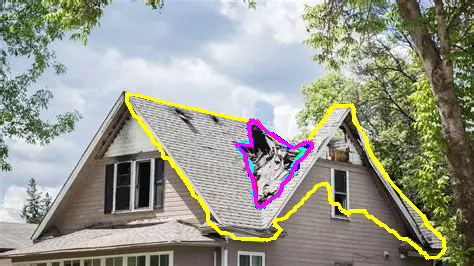

In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display
import re

model = md.vl(api_key="abcd")

image = Image.open("/content/OIP.webp")

print("Detecting...")
point_result = model.point(image, "Roof parts with damage")
points = point_result["points"]

print(f"Segmenting {len(points)} objects...")
segments = []
for point in points:
    result = model.segment(
        image,
        "Roof parts with damage",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append(result)

overlay = image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size

colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500"]

for i, seg in enumerate(segments):
    path_str = seg['path']
    bbox = seg['bbox']

    box_x_min = bbox['x_min'] * w
    box_y_min = bbox['y_min'] * h
    box_width = (bbox['x_max'] - bbox['x_min']) * w
    box_height = (bbox['y_max'] - bbox['y_min']) * h

    clean_str = re.sub(r'[a-zA-Z,]', ' ', path_str)
    try:
        raw_coords = [float(n) for n in clean_str.split()]
    except ValueError:
        continue

    pixel_poly = []
    for k in range(0, len(raw_coords), 2):
        if k + 1 < len(raw_coords):
            rel_x = raw_coords[k]
            rel_y = raw_coords[k+1]

            abs_x = box_x_min + (rel_x * box_width)
            abs_y = box_y_min + (rel_y * box_height)

            pixel_poly.append((abs_x, abs_y))

    if len(pixel_poly) > 1:
        color = colors[i % len(colors)]
        draw.line(pixel_poly, fill=color, width=4)

display(overlay)

In [ ]:
import moondream as md
from PIL import Image, ImageDraw
from IPython.display import display
import re

model = md.vl(api_key="abcd")

image = Image.open("/content/R.jpg")

print("Detecting...")
point_result = model.point(image, "All the Windows")
points = point_result["points"]

print(f"Segmenting {len(points)} objects...")
segments = []
for point in points:
    result = model.segment(
        image,
        "All the Windows",
        spatial_refs=[[point["x"], point["y"]]]
    )
    segments.append(result)

overlay = image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size

colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500"]

for i, seg in enumerate(segments):
    path_str = seg['path']
    bbox = seg['bbox']

    box_x_min = bbox['x_min'] * w
    box_y_min = bbox['y_min'] * h
    box_width = (bbox['x_max'] - bbox['x_min']) * w
    box_height = (bbox['y_max'] - bbox['y_min']) * h

    clean_str = re.sub(r'[a-zA-Z,]', ' ', path_str)
    try:
        raw_coords = [float(n) for n in clean_str.split()]
    except ValueError:
        continue

    pixel_poly = []
    for k in range(0, len(raw_coords), 2):
        if k + 1 < len(raw_coords):
            rel_x = raw_coords[k]
            rel_y = raw_coords[k+1]

            abs_x = box_x_min + (rel_x * box_width)
            abs_y = box_y_min + (rel_y * box_height)

            pixel_poly.append((abs_x, abs_y))

    if len(pixel_poly) > 1:
        color = colors[i % len(colors)]
        draw.line(pixel_poly, fill=color, width=4)

display(overlay)

This cell output is too large and can only be displayed while logged in.
